In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt


%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

### Util functions
Some util functions like Sigmoid, Relu, and their backwards used in Gradient descent

In [2]:
def sigmoid(x):
    res = 1./ (1 + np.exp(-x))
    activation_cache = x
    return res, activation_cache

print('sigmoid(1)', sigmoid(1))
print('sigmoid(-1)', sigmoid(-1))
print('sigmoid(0)', sigmoid(0))
print('sigmoid(100)', sigmoid(100))
print('sigmoid(-100)', sigmoid(-100))
y=np.array([1, 0, -1], dtype=np.float32)
print('sigmoid(arr)', sigmoid(y))

sigmoid(1) (0.7310585786300049, 1)
sigmoid(-1) (0.2689414213699951, -1)
sigmoid(0) (0.5, 0)
sigmoid(100) (1.0, 100)
sigmoid(-100) (3.7200759760208356e-44, -100)
sigmoid(arr) (array([ 0.7310586 ,  0.5       ,  0.26894143], dtype=float32), array([ 1.,  0., -1.], dtype=float32))


In [3]:
def relu(x):
    res= np.maximum(0., x)
    activation_cache = x
    return res, activation_cache
        
print('relu(1)', relu(1))
print('relu(-1)', relu(-1))
print('relu(0)', relu(0))
print('relu(100)', relu(100))
print('relu(-100)', relu(-100))
y=np.array([2, 0, -1], dtype=np.float32)
print('relu(arr)', relu(y))        

relu(1) (1.0, 1)
relu(-1) (0.0, -1)
relu(0) (0.0, 0)
relu(100) (100.0, 100)
relu(-100) (0.0, -100)
relu(arr) (array([ 2.,  0.,  0.], dtype=float32), array([ 2.,  0., -1.], dtype=float32))


If $g(.)$ is the activation function, 
`sigmoid_backward` and `relu_backward` compute $$dZ^{[l]} = dA^{[l]} * g'(Z^{[l]}) \tag{11}$$. 

This link shows that derivative of sigmoid(x) is sig(x)*(1-sig(x):

https://math.stackexchange.com/questions/78575/derivative-of-sigmoid-function-sigma-x-frac11e-x

In [4]:
def sigmoid_backward(dA, activation_cache):
    Z=activation_cache
    sig, _ = sigmoid(Z)
    sig_d = sig*(1-sig)
    return dA * sig_d 
    
dA=np.array([.7, .2], dtype=np.float32)
a_cache=np.array([100., 5.], dtype = np.float32)
print('sigmoid_backward:', sigmoid_backward(dA, a_cache))

sigmoid_backward: [ 0.          0.00132961]


In [5]:
def relu_backward(dA, activation_cache):
    Z=activation_cache
    Z[Z>0]=1.
    Z[Z<=0]=0.
    return dA * Z 
    
dA=np.array([.7, .2], dtype=np.float32)
a_cache=np.array([100., -5.], dtype = np.float32)
print('relu_backward:', relu_backward(dA, a_cache))

relu_backward: [ 0.69999999  0.        ]


In [6]:
# GRADED FUNCTION: initialize_parameters_deep

def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        ### START CODE HERE ### (≈ 2 lines of code)
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        ### END CODE HERE ###
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

In [7]:
parameters = initialize_parameters_deep([5,4,3])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01788628  0.0043651   0.00096497 -0.01863493 -0.00277388]
 [-0.00354759 -0.00082741 -0.00627001 -0.00043818 -0.00477218]
 [-0.01313865  0.00884622  0.00881318  0.01709573  0.00050034]
 [-0.00404677 -0.0054536  -0.01546477  0.00982367 -0.01101068]]
b1 = [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
W2 = [[-0.01185047 -0.0020565   0.01486148  0.00236716]
 [-0.01023785 -0.00712993  0.00625245 -0.00160513]
 [-0.00768836 -0.00230031  0.00745056  0.01976111]]
b2 = [[ 0.]
 [ 0.]
 [ 0.]]


In [8]:
# GRADED FUNCTION: linear_forward

def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python dictionary containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    Z = np.dot(W, A)+ b
    ### END CODE HERE ###
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

In [9]:
A, W, b = linear_forward_test_case()

Z, linear_cache = linear_forward(A, W, b)
print("Z = " + str(Z))

NameError: name 'linear_forward_test_case' is not defined

In [11]:
# GRADED FUNCTION: linear_activation_forward

def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python dictionary containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines of code)
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
        ### END CODE HERE ###
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines of code)
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
        ### END CODE HERE ###
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [12]:
# GRADED FUNCTION: L_model_forward

def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_relu_forward() (there are L-1 of them, indexed from 0 to L-2)
                the cache of linear_sigmoid_forward() (there is one, indexed L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        ### START CODE HERE ### (≈ 2 lines of code)
        W=parameters["W" + str(l)]
        b=parameters["b" + str(l)]
        A, cache = linear_activation_forward(A_prev, W, b, activation = "relu")
        caches.append(cache)
        
        ### END CODE HERE ###
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    ### START CODE HERE ### (≈ 2 lines of code)
    W=parameters["W" + str(L)]
    b=parameters["b" + str(L)]
    AL, cache = linear_activation_forward(A, W, b, activation = "sigmoid")
    caches.append(cache)
    
    ### END CODE HERE ###
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

In [13]:
# GRADED FUNCTION: compute_cost

def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    
    m = Y.shape[1]

    # Compute loss from aL and y.
    ### START CODE HERE ### (≈ 1 lines of code)
    cost = -np.sum( Y*np.log(AL) + (1-Y)*np.log(1-AL) )/m
    ### END CODE HERE ###
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost

In [14]:
# GRADED FUNCTION: linear_backward

def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    ### START CODE HERE ### (≈ 3 lines of code)
    dW = np.dot(dZ, A_prev.transpose())/m
    db = np.sum(dZ, axis=1, keepdims=True)/m
    dA_prev = np.dot(W.transpose(), dZ)
    ### END CODE HERE ###
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [15]:
# GRADED FUNCTION: linear_activation_backward

def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        ### START CODE HERE ### (≈ 2 lines of code)
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        ### END CODE HERE ###
        
    elif activation == "sigmoid":
        ### START CODE HERE ### (≈ 2 lines of code)
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        ### END CODE HERE ###
    
    return dA_prev, dW, db

In [16]:
# GRADED FUNCTION: L_model_backward

def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    ### START CODE HERE ### (1 line of code)
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    ### END CODE HERE ###
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "AL, Y, caches". Outputs: "grads["dAL"], grads["dWL"], grads["dbL"]
    ### START CODE HERE ### (approx. 2 lines)
    current_cache = caches[L-1]
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")
    ### END CODE HERE ###
    
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 2)], caches". Outputs: "grads["dA" + str(l + 1)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        ### START CODE HERE ### (approx. 5 lines)
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l+2)], current_cache, activation = "relu")
        grads["dA" + str(l + 1)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
        ### END CODE HERE ###

    return grads

In [17]:
# GRADED FUNCTION: update_parameters

def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    ### START CODE HERE ### (≈ 3 lines of code)
    for l in range(L):
        parameters["W" + str(l+1)] -= learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] -= learning_rate * grads["db" + str(l+1)]
    ### END CODE HERE ###
        
    return parameters

### The application of the model

In [18]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

print('The app')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The app


##### Data preprocessing functions

In [28]:
def preprocess(data):
    data[data=='female']=1
    data[data=='male']=2
    data[data=='C']=1
    data[data=='Q']=2
    data[data=='S']=3
    data=np.array(data)
    data[data=='']=0.0 # needed for any null values
    data=data.astype(float)

    print('data[1]', data[1])
   
    #Normalize the data
    for i in range(data.shape[1]):
        data[:, i] = data[:, i]/data[:, i].max()
    
    print('normalized data[1]', data[1])
    return data



In [30]:
import csv as csv

csv_file_object = csv.reader(open('train.csv', 'rt')) 	# Load in the csv file
header = next(csv_file_object) 						# Skip the fist line as it is a header
data=[] 												# Create a variable to hold the data

for row in csv_file_object: 							# Skip through each row in the csv file,
    data.append(row[0:]) 								# adding each row to the data variable
data = np.array(data) 									# Then convert from a list to an array.

print('len: ', len(data[0:, 0]))
print('2nd name: ', data[1, 3])

#data = data[:,[1, 2, 4, 5, 6, 7, 9, 11] ] # All relevant columns
#data = data[:,[1, 2, 4, 5, 6, 7, 11] ] # If Not using fare
data = data[:,[1, 2, 4, 5, 6, 7, 9] ] #Not using embarked

data=preprocess(data)

np.random.shuffle(data)
print('data.shape: ', data.shape)

#80% as tarining data
num_train=int(.8*len(data))


train_data=data[0:num_train]
validation_data=data[num_train:]

print('num train: ', len(train_data))
print('num validation: ', len(validation_data))

train_x=train_data[:, 1:]
train_y=np.array([train_data[:, 0]])
train_x = train_x.transpose() # the model expects inputs this way 
print('train_x.shape: ', train_x.shape)
print('train_y.shape: ', train_y.shape)

valid_x=validation_data[:, 1:]
valid_y=np.array([validation_data[:, 0]])
valid_x = valid_x.transpose() # the model expects inputs this way 

print('valid_x.shape: ', valid_x.shape)
print('valid_y.shape: ', valid_y.shape)

len:  891
2nd name:  Cumings, Mrs. John Bradley (Florence Briggs Thayer)
data[1] [  1.       1.       1.      38.       1.       0.      71.2833]
normalized data[1] [ 1.          0.33333333  0.5         0.475       0.125       0.
  0.13913574]
data.shape:  (891, 7)
num train:  712
num validation:  179
train_x.shape:  (6, 712)
train_y.shape:  (1, 712)
valid_x.shape:  (6, 179)
valid_y.shape:  (1, 179)


In [31]:
### CONSTANTS ###
layers_dims = [train_x.shape[0], 50, 1] #  n-layer model

In [32]:
# GRADED FUNCTION: L_layer_model

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization.
    ### START CODE HERE ###
    parameters = initialize_parameters_deep(layers_dims)
    ### END CODE HERE ###
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        ### START CODE HERE ### (≈ 1 line of code)
        AL, caches = L_model_forward(X, parameters)
        ### END CODE HERE ###
        
        # Compute cost.
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(AL, Y)
        ### END CODE HERE ###
    
        # Backward propagation.
        ### START CODE HERE ### (≈ 1 line of code)
        grads = L_model_backward(AL, Y, caches)
        ### END CODE HERE ###
 
        # Update parameters.
        ### START CODE HERE ### (≈ 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###
                
        # Print the cost every 2000 training example
        if print_cost and i % 2000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 2000 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.692914
Cost after iteration 2000: 0.665078
Cost after iteration 4000: 0.656923
Cost after iteration 6000: 0.637191
Cost after iteration 8000: 0.601919
Cost after iteration 10000: 0.556467
Cost after iteration 12000: 0.520066
Cost after iteration 14000: 0.496934
Cost after iteration 16000: 0.482925
Cost after iteration 18000: 0.474143
Cost after iteration 20000: 0.468414
Cost after iteration 22000: 0.464596
Cost after iteration 24000: 0.462039
Cost after iteration 26000: 0.460316
Cost after iteration 28000: 0.459147
Cost after iteration 30000: 0.458338
Cost after iteration 32000: 0.457780
Cost after iteration 34000: 0.457390
Cost after iteration 36000: 0.457127
Cost after iteration 38000: 0.456945
Cost after iteration 40000: 0.456819
Cost after iteration 42000: 0.456728
Cost after iteration 44000: 0.456661
Cost after iteration 46000: 0.456609
Cost after iteration 48000: 0.456569
Cost after iteration 50000: 0.456535
Cost after iteration 52000: 0.456506
Cost afte

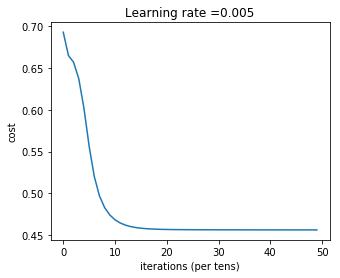

In [33]:
parameters = L_layer_model(train_x, train_y, layers_dims, learning_rate = .005, num_iterations = 100000, print_cost = True)

In [53]:
def predict(x, y, params):
    al, _ = L_model_forward(x, parameters)    
    al[al<=.5]=0
    al[al>.5]=1
    if y != None:
        assert(al.shape == y.shape)
        numy=y.shape[1]
        print('numy: ', numy)
        total = np.sum(np.abs(y-al))
        print('total diff: ', total)
        print('Accuracy: ', 1. - total/ numy)
        pos=2
        print('pos: ', pos, al[0, pos], y[0, pos])
    return al

In [54]:
pred_train = predict(train_x, train_y, parameters)

numy:  712
total diff:  152.0
Accuracy:  0.786516853933
pos:  2 1.0 1.0


/home/khush/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [55]:
valid_train = predict(valid_x, valid_y, parameters)

numy:  179
total diff:  36.0
Accuracy:  0.798882681564
pos:  2 0.0 0.0


/home/khush/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


### Trying it on test data 

In [75]:
import csv as csv

csv_file_object = csv.reader(open('test.csv', 'rt')) 	# Load in the csv file
header = next(csv_file_object) 						# Skip the fist line as it is a header
data=[] 												# Create a variable to hold the data

for row in csv_file_object: 							# Skip through each row in the csv file,
    data.append(row[0:]) 								# adding each row to the data variable
data = np.array(data) 									# Then convert from a list to an array.



ids=data[:,0]
print('len: ', len(ids))

#Note in test data columns are diff than in train
data = data[:,[1, 3, 4, 5, 6, 8] ] #Not using embarked

data=preprocess(data)
test_x=data.transpose()

len:  418
data[1] [  3.   1.  47.   1.   0.   7.]
normalized data[1] [ 1.          0.5         0.61842105  0.125       0.          0.01366309]


In [92]:
test_res = predict(test_x, None, parameters)
print('Test Results')
ids=ids.astype(int)
ids=np.array(ids, dtype=int)
test_res=np.array(test_res, dtype=int)
#print(ids)
#print(test_res)
out=np.zeros((len(ids), 2), dtype=int)
out[:,0]=ids
out[:,1]=test_res
#print(out)

#Write the output to results file
test_out_file="test_results.csv"
with open(test_out_file, "wb") as f:
    f.write(b'PassengerId,Survived\n')
    np.savetxt(f, out.astype(int), fmt='%i', delimiter=",")

print("Output written to file: ", test_out_file)

Test Results
Output written to file:  test_results.csv
